In [1]:
import requests
import pandas as pd
import numpy as np
import pycountry
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = "https://ghoapi.azureedge.net/api/NCD_BMI_30C"
response = requests.get(url)
data = response.json()

In [3]:
data.keys()

dict_keys(['@odata.context', 'value'])

In [5]:
df1 = pd.DataFrame(data['value'])
df1['age_group'] = "adults"

In [6]:
url = "https://ghoapi.azureedge.net/api/NCD_BMI_PLUS2C"

response = requests.get(url)

data = response.json()

In [7]:
df2 = pd.DataFrame(data['value'])
df2['age_group'] = "children"

In [8]:
df_obesity = pd.concat([df1, df2])
df_obesity.head()

,Id,IndicatorCode,SpatialDimType,SpatialDim,TimeDimType,ParentLocationCode,ParentLocation,Dim1Type,TimeDim,Dim1,...,Value,NumericValue,Low,High,Comments,Date,TimeDimensionValue,TimeDimensionBegin,TimeDimensionEnd,age_group
0,1001861,NCD_BMI_30C,COUNTRY,PNG,YEAR,WPR,Western Pacific,SEX,2003,SEX_FMLE,...,17.5 [14.5-20.7],17.519599,14.505956,20.732972,None,2024-02-29T16:06:41.017+01:00,2003,2003-01-01T00:00:00+01:00,2003-12-31T00:00:00+01:00,adults
1,1001954,NCD_BMI_30C,COUNTRY,PHL,YEAR,WPR,Western Pacific,SEX,2022,SEX_BTSX,...,8.7 [6.9-10.8],8.736049,6.895792,10.759087,None,2024-02-29T16:06:41.017+01:00,2022,2022-01-01T00:00:00+01:00,2022-12-31T00:00:00+01:00,adults
2,1002189,NCD_BMI_30C,COUNTRY,LSO,YEAR,AFR,Africa,SEX,1992,SEX_BTSX,...,7.3 [5.9-8.8],7.295471,5.923229,8.830373,None,2024-02-29T16:06:41.017+01:00,1992,1992-01-01T00:00:00+01:00,1992-12-31T00:00:00+01:00,adults
3,1002476,NCD_BMI_30C,COUNTRY,DJI,YEAR,EMR,Eastern Mediterranean,SEX,2000,SEX_BTSX,...,3.3 [1.6-6.1],3.343800,1.583446,6.111924,None,2024-02-29T16:06:41.017+01:00,2000,2000-01-01T00:00:00+01:00,2000-12-31T00:00:00+01:00,adults
4,1002666,NCD_BMI_30C,COUNTRY,UKR,YEAR,EUR,Europe,SEX,1992,SEX_MLE,...,9.9 [5.7-15.4],9.919050,5.688633,15.414481,None,2024-02-29T16:06:41.017+01:00,1992,1992-01-01T00:00:00+01:00,1992-12-31T00:00:00+01:00,adults


In [10]:
url = "https://ghoapi.azureedge.net/api/NCD_BMI_18C"

response = requests.get(url)

data = response.json()

In [11]:
df3 = pd.DataFrame(data['value'])
df3['age_group'] = "adults"

In [12]:
url= "https://ghoapi.azureedge.net/api/NCD_BMI_MINUS2C"

response = requests.get(url)

data = response.json()

In [13]:
df4 = pd.DataFrame(data['value'])
df4['age_group'] = "children"

In [14]:
df_malnutrition = pd.concat([df3, df4])

df_malnutrition.head()

,Id,IndicatorCode,SpatialDimType,SpatialDim,ParentLocationCode,TimeDimType,ParentLocation,Dim1Type,Dim1,TimeDim,...,Value,NumericValue,Low,High,Comments,Date,TimeDimensionValue,TimeDimensionBegin,TimeDimensionEnd,age_group
0,1001086,NCD_BMI_18C,COUNTRY,LAO,WPR,YEAR,Western Pacific,SEX,SEX_BTSX,1991,...,17.4 [12.8-22.3],17.366789,12.772778,22.288293,None,2024-02-29T16:06:41.017+01:00,1991,1991-01-01T00:00:00+01:00,1991-12-31T00:00:00+01:00,adults
1,1002084,NCD_BMI_18C,COUNTRY,ECU,AMR,YEAR,Americas,SEX,SEX_MLE,2014,...,1.9 [1.4-2.5],1.893187,1.363887,2.497473,None,2024-02-29T16:06:41.017+01:00,2014,2014-01-01T00:00:00+01:00,2014-12-31T00:00:00+01:00,adults
2,1002153,NCD_BMI_18C,COUNTRY,DOM,AMR,YEAR,Americas,SEX,SEX_FMLE,2000,...,5.3 [4.3-6.5],5.325700,4.275320,6.462620,None,2024-02-29T16:06:41.017+01:00,2000,2000-01-01T00:00:00+01:00,2000-12-31T00:00:00+01:00,adults
3,1002691,NCD_BMI_18C,COUNTRY,GEO,EUR,YEAR,Europe,SEX,SEX_MLE,2005,...,1.9 [1.0-3.1],1.862315,0.954530,3.096512,None,2024-02-29T16:06:41.017+01:00,2005,2005-01-01T00:00:00+01:00,2005-12-31T00:00:00+01:00,adults
4,1003774,NCD_BMI_18C,COUNTRY,BGD,SEAR,YEAR,South-East Asia,SEX,SEX_MLE,2018,...,17.2 [14.6-19.9],17.243017,14.624000,19.899449,None,2024-02-29T16:06:41.017+01:00,2018,2018-01-01T00:00:00+01:00,2018-12-31T00:00:00+01:00,adults


In [15]:
df_obesity = df_obesity[(df_obesity["TimeDim"]>=2012) & (df_obesity["TimeDim"]<=2022)]


In [16]:
df_malnutrition = df_malnutrition[(df_malnutrition['TimeDim']>=2012) & (df_malnutrition['TimeDim']<=2022)]

In [17]:
columns_to_keep = ["ParentLocation","Dim1","TimeDim","Low","High","NumericValue","SpatialDim","age_group"]

df_obesity = df_obesity[columns_to_keep]

df_obesity


,ParentLocation,Dim1,TimeDim,Low,High,NumericValue,SpatialDim,age_group
1,Western Pacific,SEX_BTSX,2022,6.895792,10.759087,8.736049,PHL,adults
8,Africa,SEX_FMLE,2018,3.219575,5.739539,4.366573,TCD,adults
9,Africa,SEX_BTSX,2013,9.511732,11.887711,10.666425,STP,adults
12,Eastern Mediterranean,SEX_MLE,2020,15.793777,19.245727,17.487641,IRN,adults
19,Eastern Mediterranean,SEX_MLE,2020,23.089589,33.815336,28.335530,IRQ,adults
...,...,...,...,...,...,...,...,...
62347,Europe,SEX_BTSX,2020,0.964176,2.197432,1.475931,TJK,children
62350,Eastern Mediterranean,SEX_FMLE,2012,0.302039,5.872414,1.966190,SOM,children
62358,Western Pacific,SEX_MLE,2021,3.325899,34.877816,16.634887,VUT,children
62361,Africa,SEX_MLE,2014,0.236481,6.341185,2.032189,MDG,children


In [18]:
columns_to_keep = ["ParentLocation","Dim1","TimeDim","Low","High","NumericValue","SpatialDim","age_group"]
df_malnutrition = df_malnutrition[columns_to_keep]

df_malnutrition

,ParentLocation,Dim1,TimeDim,Low,High,NumericValue,SpatialDim,age_group
1,Americas,SEX_MLE,2014,1.363887,2.497473,1.893187,ECU,adults
4,South-East Asia,SEX_MLE,2018,14.624000,19.899449,17.243017,BGD,adults
5,Americas,SEX_FMLE,2013,1.699368,2.609000,2.115917,GTM,adults
6,Africa,SEX_FMLE,2021,3.972036,8.077021,5.795110,GAB,adults
10,Western Pacific,SEX_BTSX,2017,2.428230,3.842155,3.090652,MNG,adults
...,...,...,...,...,...,...,...,...
62357,Americas,SEX_FMLE,2013,2.795499,5.714345,4.140693,HTI,children
62359,Europe,SEX_BTSX,2018,5.428173,10.218395,7.574986,TJK,children
62360,Western Pacific,SEX_BTSX,2016,0.621721,3.507061,1.703645,PNG,children
62366,Western Pacific,SEX_FMLE,2020,0.064152,2.810176,0.734066,WSM,children


In [19]:
df_obesity = df_obesity.rename(columns={"TimeDim":"Year","Dim1":"Gender","NumericValue":"Mean_Estimate","LowerBound":"Low","UpperBound":"High","ParentLocation":"Region","SpatialDim":"Country"})

df_obesity.head()


,Region,Gender,Year,Low,High,Mean_Estimate,Country,age_group
1,Western Pacific,SEX_BTSX,2022,6.895792,10.759087,8.736049,PHL,adults
8,Africa,SEX_FMLE,2018,3.219575,5.739539,4.366573,TCD,adults
9,Africa,SEX_BTSX,2013,9.511732,11.887711,10.666425,STP,adults
12,Eastern Mediterranean,SEX_MLE,2020,15.793777,19.245727,17.487641,IRN,adults
19,Eastern Mediterranean,SEX_MLE,2020,23.089589,33.815336,28.335530,IRQ,adults


In [20]:
df_malnutrition = df_malnutrition.rename(columns={"TimeDim":"Year","Dim1":"Gender","NumericValue":"Mean_Estimate","LowerBound":"Low","UpperBound":"High","ParentLocation":"Region","SpatialDim":"Country"})
df_malnutrition.head()

,Region,Gender,Year,Low,High,Mean_Estimate,Country,age_group
1,Americas,SEX_MLE,2014,1.363887,2.497473,1.893187,ECU,adults
4,South-East Asia,SEX_MLE,2018,14.624000,19.899449,17.243017,BGD,adults
5,Americas,SEX_FMLE,2013,1.699368,2.609000,2.115917,GTM,adults
6,Africa,SEX_FMLE,2021,3.972036,8.077021,5.795110,GAB,adults
10,Western Pacific,SEX_BTSX,2017,2.428230,3.842155,3.090652,MNG,adults


In [21]:
df_obesity['Gender'] = df_obesity['Gender'].replace({"SEX_BTSX":"Both","SEX_MLE":"Male","SEX_FMLE":"Female"})

df_obesity.head()

,Region,Gender,Year,Low,High,Mean_Estimate,Country,age_group
1,Western Pacific,Both,2022,6.895792,10.759087,8.736049,PHL,adults
8,Africa,Female,2018,3.219575,5.739539,4.366573,TCD,adults
9,Africa,Both,2013,9.511732,11.887711,10.666425,STP,adults
12,Eastern Mediterranean,Male,2020,15.793777,19.245727,17.487641,IRN,adults
19,Eastern Mediterranean,Male,2020,23.089589,33.815336,28.335530,IRQ,adults


In [22]:
df_malnutrition['Gender'] = df_malnutrition['Gender'].replace({"SEX_BTSX":"Both","SEX_MLE":"Male","SEX_FMLE":"Female"})

df_malnutrition.head()

,Region,Gender,Year,Low,High,Mean_Estimate,Country,age_group
1,Americas,Male,2014,1.363887,2.497473,1.893187,ECU,adults
4,South-East Asia,Male,2018,14.624000,19.899449,17.243017,BGD,adults
5,Americas,Female,2013,1.699368,2.609000,2.115917,GTM,adults
6,Africa,Female,2021,3.972036,8.077021,5.795110,GAB,adults
10,Western Pacific,Both,2017,2.428230,3.842155,3.090652,MNG,adults


In [23]:
def rename_country(country):
    try:
        return pycountry.countries.get(alpha_3=country).name
    except:
        return country
    
df_obesity['Country'] = df_obesity['Country'].apply(rename_country)

df_obesity.head()

,Region,Gender,Year,Low,High,Mean_Estimate,Country,age_group
1,Western Pacific,Both,2022,6.895792,10.759087,8.736049,Philippines,adults
8,Africa,Female,2018,3.219575,5.739539,4.366573,Chad,adults
9,Africa,Both,2013,9.511732,11.887711,10.666425,Sao Tome and Principe,adults
12,Eastern Mediterranean,Male,2020,15.793777,19.245727,17.487641,"Iran, Islamic Republic of",adults
19,Eastern Mediterranean,Male,2020,23.089589,33.815336,28.335530,Iraq,adults


In [24]:
def rename_country(country):
    try:
        return pycountry.countries.get(alpha_3=country).name
    except:
        return country
    
df_malnutrition['Country'] = df_malnutrition['Country'].apply(rename_country)

df_malnutrition

,Region,Gender,Year,Low,High,Mean_Estimate,Country,age_group
1,Americas,Male,2014,1.363887,2.497473,1.893187,Ecuador,adults
4,South-East Asia,Male,2018,14.624000,19.899449,17.243017,Bangladesh,adults
5,Americas,Female,2013,1.699368,2.609000,2.115917,Guatemala,adults
6,Africa,Female,2021,3.972036,8.077021,5.795110,Gabon,adults
10,Western Pacific,Both,2017,2.428230,3.842155,3.090652,Mongolia,adults
...,...,...,...,...,...,...,...,...
62357,Americas,Female,2013,2.795499,5.714345,4.140693,Haiti,children
62359,Europe,Both,2018,5.428173,10.218395,7.574986,Tajikistan,children
62360,Western Pacific,Both,2016,0.621721,3.507061,1.703645,Papua New Guinea,children
62366,Western Pacific,Female,2020,0.064152,2.810176,0.734066,Samoa,children


In [25]:
df_obesity['CI_Width'] = df_obesity['High'] - df_obesity['Low']

df_obesity.head()

,Region,Gender,Year,Low,High,Mean_Estimate,Country,age_group,CI_Width
1,Western Pacific,Both,2022,6.895792,10.759087,8.736049,Philippines,adults,3.863295
8,Africa,Female,2018,3.219575,5.739539,4.366573,Chad,adults,2.519964
9,Africa,Both,2013,9.511732,11.887711,10.666425,Sao Tome and Principe,adults,2.375979
12,Eastern Mediterranean,Male,2020,15.793777,19.245727,17.487641,"Iran, Islamic Republic of",adults,3.451950
19,Eastern Mediterranean,Male,2020,23.089589,33.815336,28.335530,Iraq,adults,10.725747


In [26]:
df_malnutrition['CI_Width'] = df_malnutrition['High'] - df_malnutrition['Low']

df_malnutrition.head()

,Region,Gender,Year,Low,High,Mean_Estimate,Country,age_group,CI_Width
1,Americas,Male,2014,1.363887,2.497473,1.893187,Ecuador,adults,1.133586
4,South-East Asia,Male,2018,14.624000,19.899449,17.243017,Bangladesh,adults,5.275449
5,Americas,Female,2013,1.699368,2.609000,2.115917,Guatemala,adults,0.909632
6,Africa,Female,2021,3.972036,8.077021,5.795110,Gabon,adults,4.104985
10,Western Pacific,Both,2017,2.428230,3.842155,3.090652,Mongolia,adults,1.413925


In [27]:
conditions = [
    (df_obesity["Mean_Estimate"] >= 30),
    (df_obesity["Mean_Estimate"] >= 25) & (df_obesity["Mean_Estimate"] < 30),
    (df_obesity["Mean_Estimate"] <= 25)
]

choices = ["High", "Moderate", "Low"]

df_obesity["obesity_level"] = np.select(conditions, choices, default="Low")

df_obesity


,Region,Gender,Year,Low,High,Mean_Estimate,Country,age_group,CI_Width,obesity_level
1,Western Pacific,Both,2022,6.895792,10.759087,8.736049,Philippines,adults,3.863295,Low
8,Africa,Female,2018,3.219575,5.739539,4.366573,Chad,adults,2.519964,Low
9,Africa,Both,2013,9.511732,11.887711,10.666425,Sao Tome and Principe,adults,2.375979,Low
12,Eastern Mediterranean,Male,2020,15.793777,19.245727,17.487641,"Iran, Islamic Republic of",adults,3.451950,Low
19,Eastern Mediterranean,Male,2020,23.089589,33.815336,28.335530,Iraq,adults,10.725747,Moderate
...,...,...,...,...,...,...,...,...,...,...
62347,Europe,Both,2020,0.964176,2.197432,1.475931,Tajikistan,children,1.233255,Low
62350,Eastern Mediterranean,Female,2012,0.302039,5.872414,1.966190,Somalia,children,5.570375,Low
62358,Western Pacific,Male,2021,3.325899,34.877816,16.634887,Vanuatu,children,31.551917,Low
62361,Africa,Male,2014,0.236481,6.341185,2.032189,Madagascar,children,6.104704,Low


In [28]:
conditions = [
    (df_malnutrition["Mean_Estimate"] >= 20),
    (df_malnutrition["Mean_Estimate"] >= 10) & (df_malnutrition["Mean_Estimate"] < 20),
    (df_malnutrition["Mean_Estimate"] <= 10)
]

choices = ["High", "Moderate", "Low"]

df_malnutrition["malnutrition_level"] = np.select(conditions, choices, default="Low")

df_malnutrition

,Region,Gender,Year,Low,High,Mean_Estimate,Country,age_group,CI_Width,malnutrition_level
1,Americas,Male,2014,1.363887,2.497473,1.893187,Ecuador,adults,1.133586,Low
4,South-East Asia,Male,2018,14.624000,19.899449,17.243017,Bangladesh,adults,5.275449,Moderate
5,Americas,Female,2013,1.699368,2.609000,2.115917,Guatemala,adults,0.909632,Low
6,Africa,Female,2021,3.972036,8.077021,5.795110,Gabon,adults,4.104985,Low
10,Western Pacific,Both,2017,2.428230,3.842155,3.090652,Mongolia,adults,1.413925,Low
...,...,...,...,...,...,...,...,...,...,...
62357,Americas,Female,2013,2.795499,5.714345,4.140693,Haiti,children,2.918846,Low
62359,Europe,Both,2018,5.428173,10.218395,7.574986,Tajikistan,children,4.790222,Low
62360,Western Pacific,Both,2016,0.621721,3.507061,1.703645,Papua New Guinea,children,2.885340,Low
62366,Western Pacific,Female,2020,0.064152,2.810176,0.734066,Samoa,children,2.746023,Low


In [29]:
df_obesity.shape

(27720, 10)

In [30]:
df_malnutrition.shape

(27720, 10)

In [31]:
df_obesity.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27720 entries, 1 to 62364
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Region         26268 non-null  object 
 1   Gender         27720 non-null  object 
 2   Year           27720 non-null  int64  
 3   Low            27720 non-null  float64
 4   High           27720 non-null  float64
 5   Mean_Estimate  27720 non-null  float64
 6   Country        27720 non-null  object 
 7   age_group      27720 non-null  object 
 8   CI_Width       27720 non-null  float64
 9   obesity_level  27720 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 2.3+ MB


In [32]:
df_malnutrition.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27720 entries, 1 to 62369
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Region              26268 non-null  object 
 1   Gender              27720 non-null  object 
 2   Year                27720 non-null  int64  
 3   Low                 27720 non-null  float64
 4   High                27720 non-null  float64
 5   Mean_Estimate       27720 non-null  float64
 6   Country             27720 non-null  object 
 7   age_group           27720 non-null  object 
 8   CI_Width            27720 non-null  float64
 9   malnutrition_level  27720 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 2.3+ MB


In [33]:
df_obesity.describe()

,Year,Low,High,Mean_Estimate,CI_Width
count,27720.000000,27720.000000,27720.000000,27720.000000,27720.000000
mean,2017.000000,9.393155,17.068488,12.761040,7.675334
std,3.162335,9.893854,12.395013,10.858925,6.616899
min,2012.000000,0.077541,0.547848,0.265672,0.216695
25%,2014.000000,2.354433,7.875503,4.753964,2.926708
50%,2017.000000,6.506534,13.704382,9.944541,5.480536
75%,2020.000000,12.697752,23.986050,17.482417,10.338880
max,2022.000000,74.365371,87.868512,80.609250,40.554062


In [34]:
df_malnutrition.describe()

,Year,Low,High,Mean_Estimate,CI_Width
count,27720.000000,27720.000000,27720.000000,27720.000000,27720.000000
mean,2017.000000,3.397094,8.147889,5.354451,4.750795
std,3.162335,3.908061,6.443692,4.811220,4.257683
min,2012.000000,0.023703,0.354833,0.175309,0.166679
25%,2014.000000,1.053666,3.143307,2.039278,1.603222
50%,2017.000000,1.907971,6.095557,3.597794,3.351093
75%,2020.000000,4.186440,11.526301,7.335245,6.530869
max,2022.000000,31.365401,43.680286,35.894114,26.701744


In [42]:
df_obesity.duplicated().sum()

np.int64(0)

In [43]:
df_malnutrition.duplicated().sum()

np.int64(0)

In [47]:
df_obesity.columns
for col in df_obesity.columns:
    print(f"{col}:\n Unique values:",df_obesity[col].nunique(),"\n",df_obesity[col].unique())
    print()

Region:
 Unique values: 6 
 ['Western Pacific' 'Africa' 'Eastern Mediterranean' 'Europe' 'Americas'
 'South-East Asia' None]

Gender:
 Unique values: 3 
 ['Both' 'Female' 'Male']

Year:
 Unique values: 11 
 [2022 2018 2013 2020 2014 2019 2021 2015 2017 2016 2012]

Low:
 Unique values: 27713 
 [ 6.8957917   3.2195754   9.5117323  ...  3.3258993   0.23648054
 10.08785   ]

High:
 Unique values: 27702 
 [10.759087   5.7395391 11.887711  ... 34.877816   6.3411847 12.760153 ]

Mean_Estimate:
 Unique values: 27712 
 [ 8.7360494  4.3665729 10.666425  ... 16.634887   2.0321887 11.390631 ]

Country:
 Unique values: 210 
 ['Philippines' 'Chad' 'Sao Tome and Principe' 'Iran, Islamic Republic of'
 'Iraq' 'Greenland' 'Armenia' 'Malta' 'Panama' 'India' 'Madagascar'
 'Guinea' 'Yemen' 'Jordan' 'Botswana' 'New Zealand' 'Mauritius' 'Belarus'
 'Belgium' 'Uganda' 'North Macedonia' 'American Samoa' 'Gabon'
 'Equatorial Guinea' 'Senegal' 'Bulgaria' 'Pakistan' 'Tuvalu' 'Israel'
 'Namibia' 'Uzbekistan' 'Alger

In [50]:
df_malnutrition.columns
for col in df_malnutrition.columns:
    print(f"{col}:\n Unique values:",df_malnutrition[col].nunique(),"\n",df_malnutrition[col].unique())
    print()

Region:
 Unique values: 6 
 ['Americas' 'South-East Asia' 'Africa' 'Western Pacific' None
 'Eastern Mediterranean' 'Europe']

Gender:
 Unique values: 3 
 ['Male' 'Female' 'Both']

Year:
 Unique values: 11 
 [2014 2018 2013 2021 2017 2016 2020 2012 2019 2022 2015]

Low:
 Unique values: 27713 
 [ 1.3638873  14.624       1.6993681  ...  0.62172064  0.06415225
  0.46517085]

High:
 Unique values: 27704 
 [ 2.4974735 19.899449   2.6089996 ...  3.5070606  2.8101757  7.3074833]

Mean_Estimate:
 Unique values: 27706 
 [ 1.8931873  17.243017    2.115917   ...  1.7036451   0.73406608
  2.5427854 ]

Country:
 Unique values: 210 
 ['Ecuador' 'Bangladesh' 'Guatemala' 'Gabon' 'Mongolia' 'Sierra Leone'
 'SEAR' 'Qatar' 'Uzbekistan' 'United Kingdom' 'Honduras' 'Vanuatu'
 'Montenegro' 'Trinidad and Tobago' 'Cook Islands' 'Lesotho' 'Germany'
 'Gambia' 'WB_LI' 'Venezuela, Bolivarian Republic of' 'Cyprus' 'Congo'
 'Niue' 'Algeria' 'Latvia' 'Palau' 'Croatia' 'Peru' 'Tonga' 'Afghanistan'
 'Italy' 'Myanmar' '

In [51]:
df_obesity.isnull().sum()

Region           1452
Gender              0
Year                0
Low                 0
High                0
Mean_Estimate       0
Country             0
age_group           0
CI_Width            0
obesity_level       0
dtype: int64

In [52]:
special_cases = {
    'GLOBAL': 'Global',
    'WB_LMI': 'Low & Middle Income',
    'WB_HI': 'High Income',
    'WB_LI': 'Low Income',
    'EMR': 'Eastern Mediterranean Region',
    'EUR': 'Europe',
    'AFR': 'Africa',
    'SEAR': 'South-East Asia Region',
    'WPR': 'Western Pacific Region',
    'AMR': 'Americas Region',
    'WB_UMI': 'Upper Middle Income'
}

df_obesity['Region'] = df_obesity['Region'].fillna(df_obesity['Country'].map(special_cases))


In [53]:
df_obesity['Region'] = df_obesity['Region'].fillna(df_obesity['Country'])
df_obesity['Region'].isna().sum()

np.int64(0)

In [54]:
df_obesity.isnull().sum()

Region           0
Gender           0
Year             0
Low              0
High             0
Mean_Estimate    0
Country          0
age_group        0
CI_Width         0
obesity_level    0
dtype: int64

In [55]:
df_malnutrition.isnull().sum()

Region                1452
Gender                   0
Year                     0
Low                      0
High                     0
Mean_Estimate            0
Country                  0
age_group                0
CI_Width                 0
malnutrition_level       0
dtype: int64

In [56]:
special_cases = {
    'GLOBAL': 'Global',
    'WB_LMI': 'Low & Middle Income',
    'WB_HI': 'High Income',
    'WB_LI': 'Low Income',
    'EMR': 'Eastern Mediterranean Region',
    'EUR': 'Europe',
    'AFR': 'Africa',
    'SEAR': 'South-East Asia Region',
    'WPR': 'Western Pacific Region',
    'AMR': 'Americas Region',
    'WB_UMI': 'Upper Middle Income'
}

df_malnutrition['Region'] = df_malnutrition['Region'].fillna(df_malnutrition['Country'].map(special_cases))

In [57]:
df_malnutrition['Region'] = df_malnutrition['Region'].fillna(df_malnutrition['Country'])
df_malnutrition['Region'].isna().sum()

np.int64(0)

In [58]:
df_malnutrition.isnull().sum()

Region                0
Gender                0
Year                  0
Low                   0
High                  0
Mean_Estimate         0
Country               0
age_group             0
CI_Width              0
malnutrition_level    0
dtype: int64

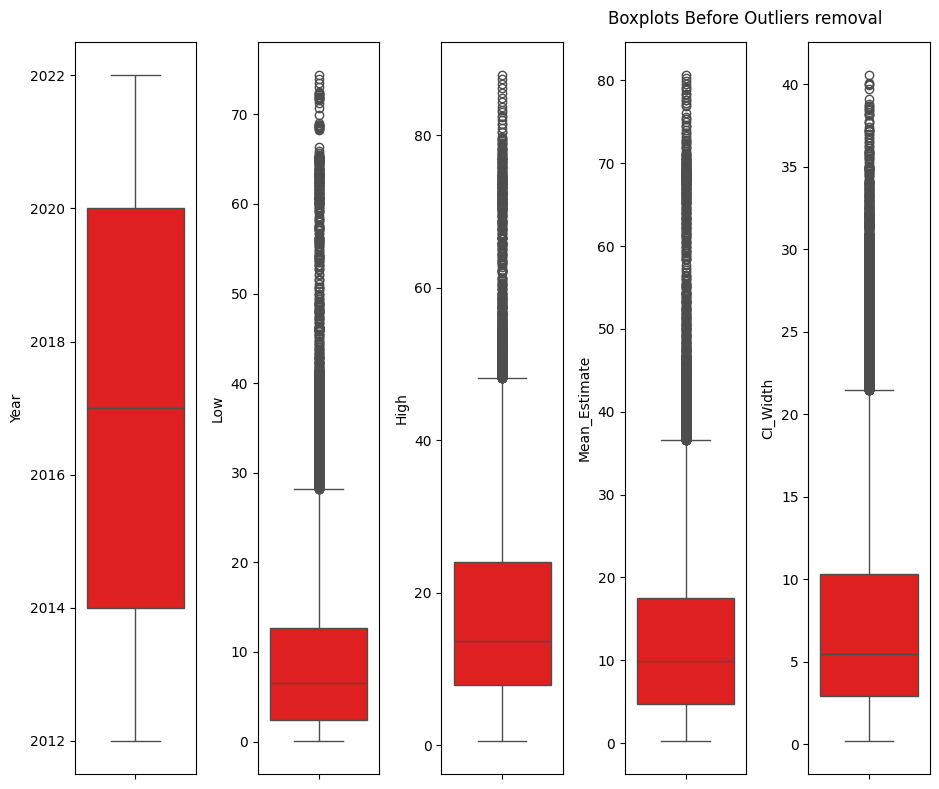

In [64]:
numerical_columns = ['Year','Low','High','Mean_Estimate','CI_Width']

plt.figure(figsize=(15, 8))
plt.suptitle("Boxplots Before Outliers removal")
for i in range(0,len(numerical_columns)):
    plt.subplot(1, 8, i+1)
    sns.boxplot(data=df_obesity[numerical_columns[i]], color='red', )
    plt.tight_layout()

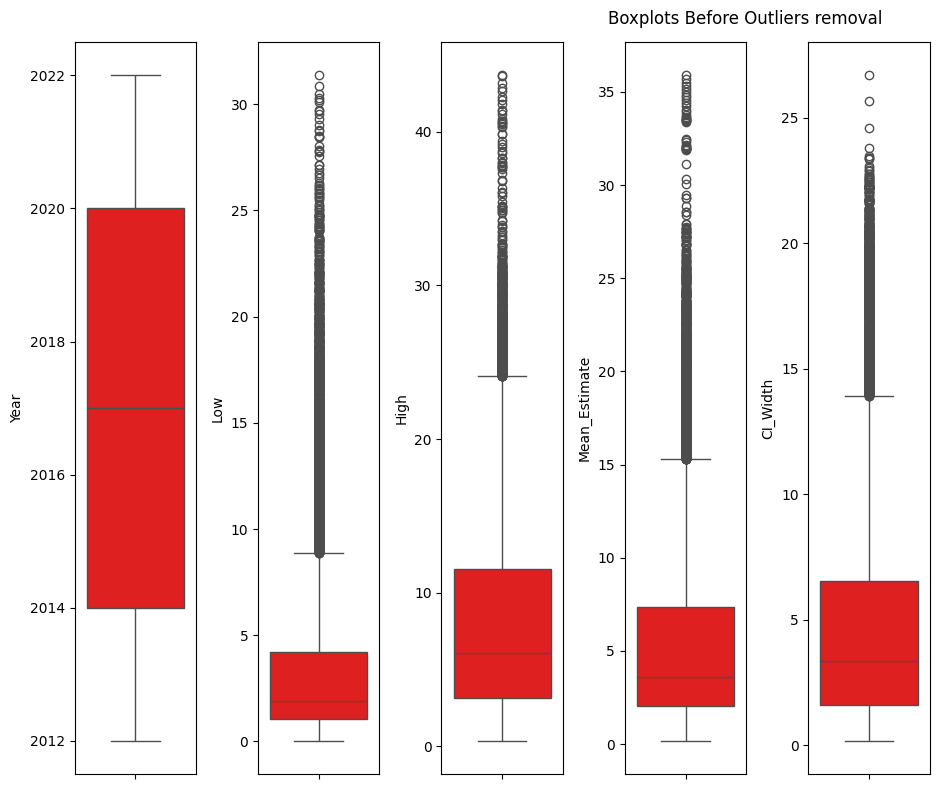

In [65]:
numerical_columns = ['Year','Low','High','Mean_Estimate','CI_Width']

plt.figure(figsize=(15, 8))
plt.suptitle("Boxplots Before Outliers removal")
for i in range(0,len(numerical_columns)):
    plt.subplot(1, 8, i+1)
    sns.boxplot(data=df_malnutrition[numerical_columns[i]], color='red', )
    plt.tight_layout()

In [66]:
numerical_columns = ['Year','Low','High','Mean_Estimate','CI_Width']
for col in numerical_columns:
    Q1 = df_obesity[col].quantile(0.25)
    Q3 = df_obesity[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df_obesity[col] = np.where(df_obesity[col] < lower_bound, lower_bound, df_obesity[col])
    df_obesity[col] = np.where(df_obesity[col] > upper_bound, upper_bound, df_obesity[col])

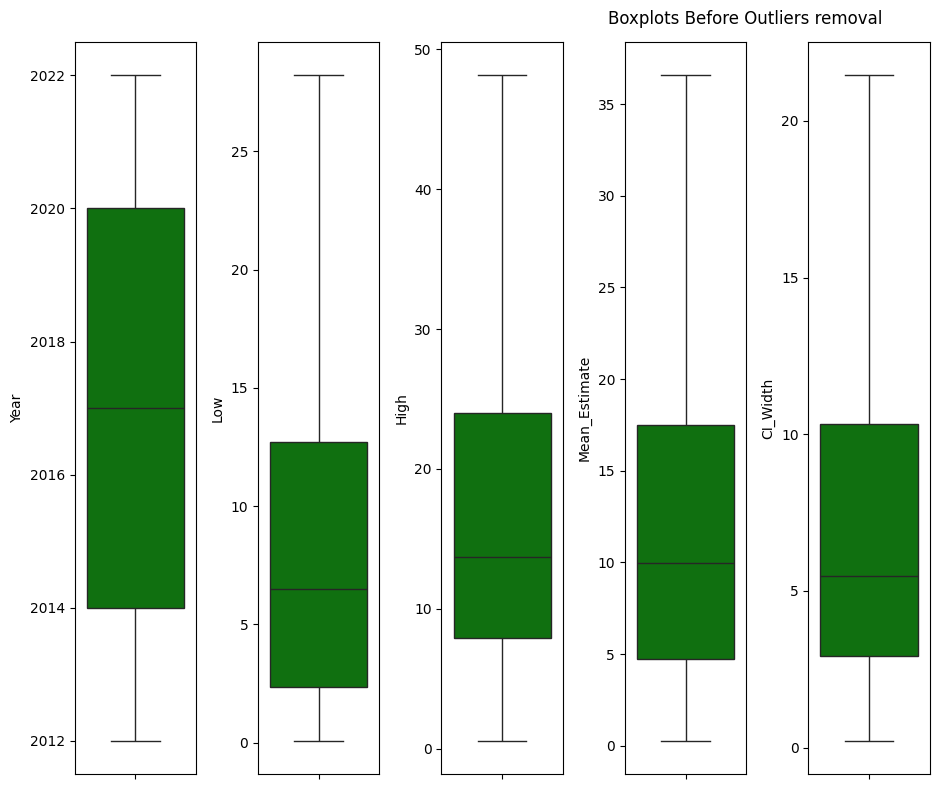

In [ ]:
numerical_columns = ['Year','Low','High','Mean_Estimate','CI_Width']

plt.figure(figsize=(15, 8))
plt.suptitle("Boxplots After Outliers")
for i in range(0,len(numerical_columns)):
    plt.subplot(1, 8, i+1)
    sns.boxplot(data=df_obesity[numerical_columns[i]], color='green', )
    plt.tight_layout()

In [68]:
numerical_columns = ['Year','Low','High','Mean_Estimate','CI_Width']
for col in numerical_columns:
    Q1 = df_malnutrition[col].quantile(0.25)
    Q3 = df_malnutrition[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df_malnutrition[col] = np.where(df_malnutrition[col] < lower_bound, lower_bound, df_malnutrition[col])
    df_malnutrition[col] = np.where(df_malnutrition[col] > upper_bound, upper_bound, df_malnutrition[col])

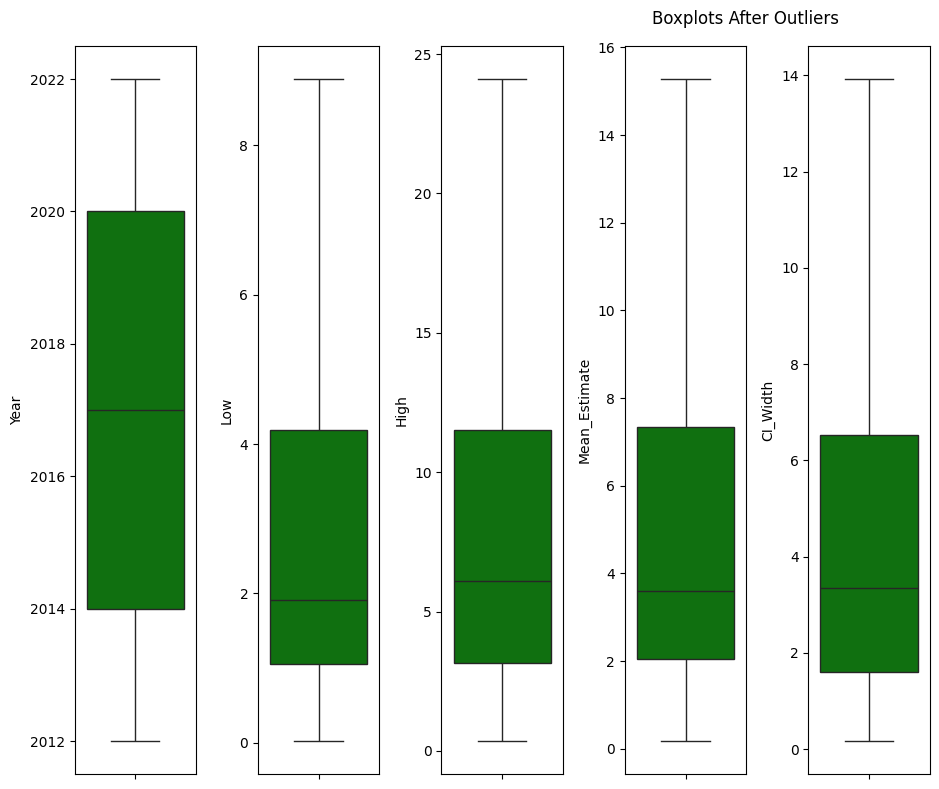

In [69]:
numerical_columns = ['Year','Low','High','Mean_Estimate','CI_Width']

plt.figure(figsize=(15, 8))
plt.suptitle("Boxplots After Outliers")
for i in range(0,len(numerical_columns)):
    plt.subplot(1, 8, i+1)
    sns.boxplot(data=df_malnutrition[numerical_columns[i]], color='green', )
    plt.tight_layout()

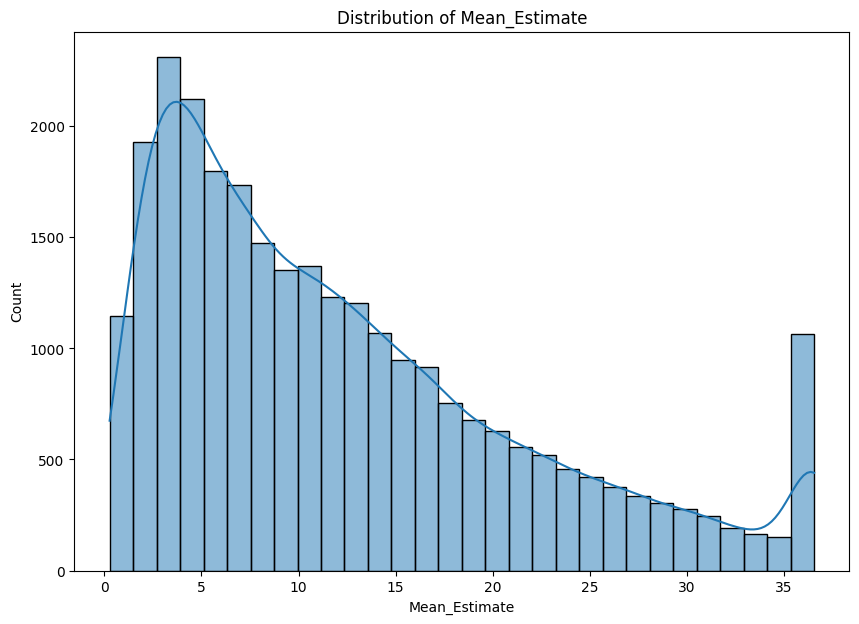

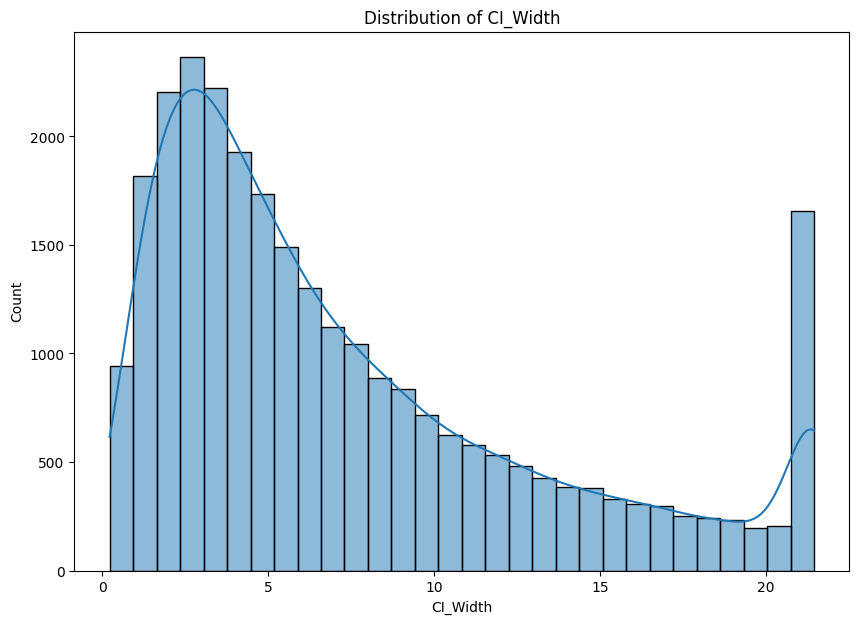

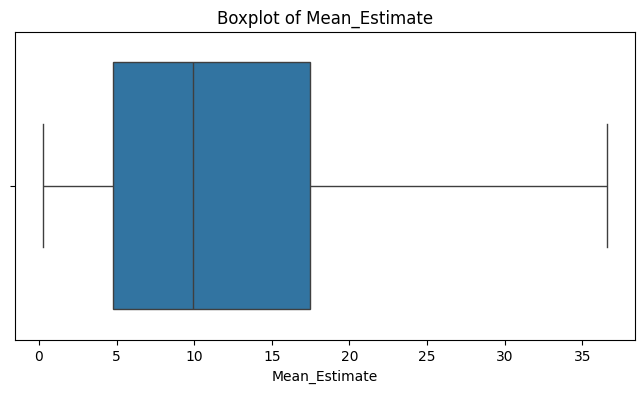

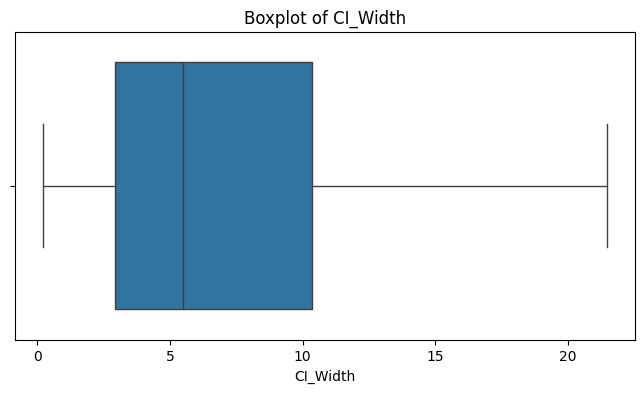

In [76]:
#Distribution of Mean_Estimate and CI_Width for Obesity
plt.figure(figsize=(10,7))
sns.histplot(df_obesity['Mean_Estimate'], kde=True, bins=30)
plt.title("Distribution of Mean_Estimate")
plt.show()

plt.figure(figsize=(10,7))
sns.histplot(df_obesity['CI_Width'], kde=True, bins=30)
plt.title("Distribution of CI_Width")
plt.show()

# Boxplots of Mean_Estimate and CI_Width for Obesity
plt.figure(figsize=(8,4))
sns.boxplot(x=df_obesity['Mean_Estimate'])
plt.title("Boxplot of Mean_Estimate")
plt.show()

plt.figure(figsize=(8,4))
sns.boxplot(x=df_obesity['CI_Width'])
plt.title("Boxplot of CI_Width")
plt.show()


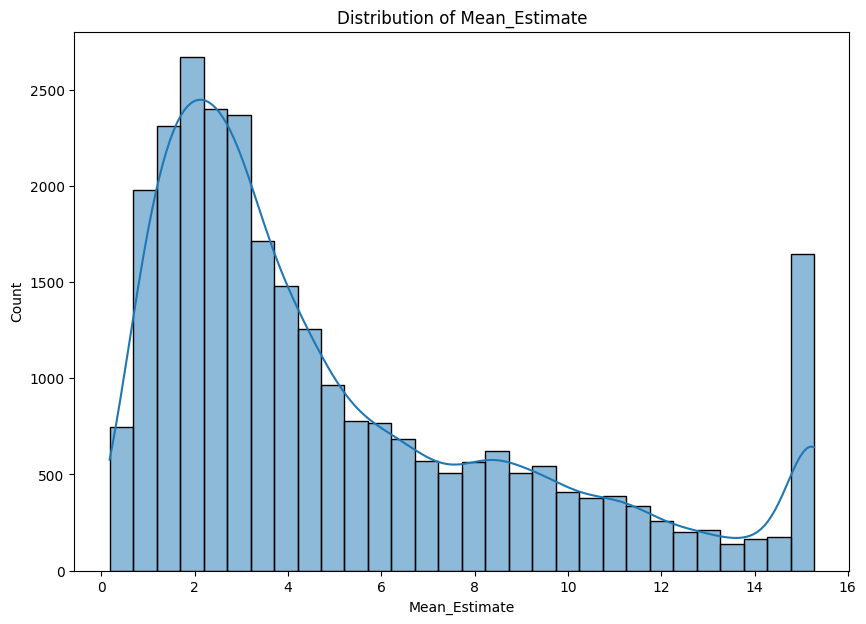

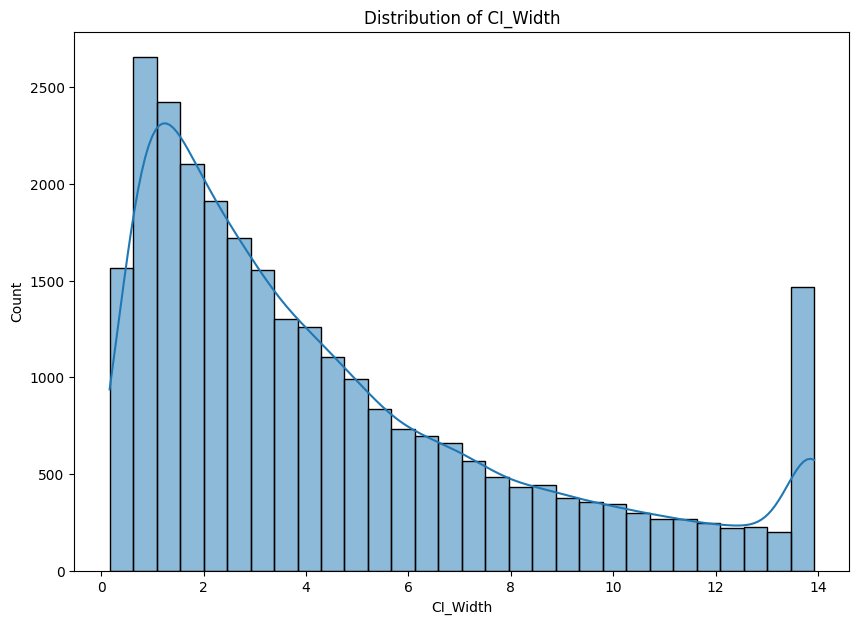

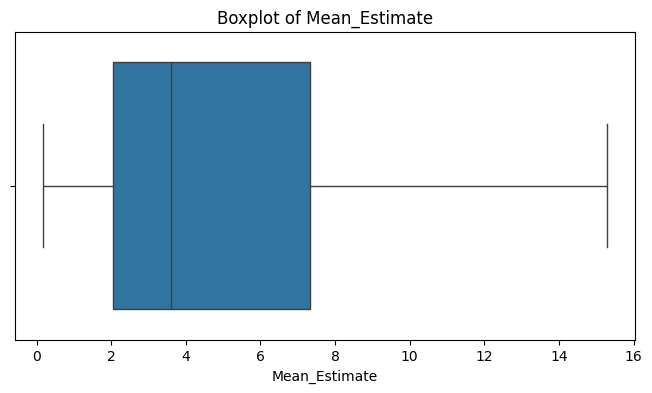

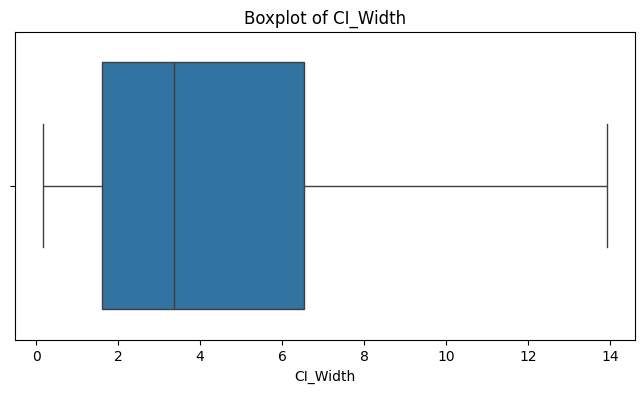

In [77]:
#Distribution of Mean_Estimate and CI_Width for Malnutrition
plt.figure(figsize=(10,7))
sns.histplot(df_malnutrition['Mean_Estimate'], kde=True, bins=30)
plt.title("Distribution of Mean_Estimate")
plt.show()

plt.figure(figsize=(10,7))
sns.histplot(df_malnutrition['CI_Width'], kde=True, bins=30)
plt.title("Distribution of CI_Width")
plt.show()

# Boxplots of Mean_Estimate and CI_Width for Malnutrition
plt.figure(figsize=(8,4))
sns.boxplot(x=df_malnutrition['Mean_Estimate'])
plt.title("Boxplot of Mean_Estimate")
plt.show()

plt.figure(figsize=(8,4))
sns.boxplot(x=df_malnutrition['CI_Width'])
plt.title("Boxplot of CI_Width")
plt.show()

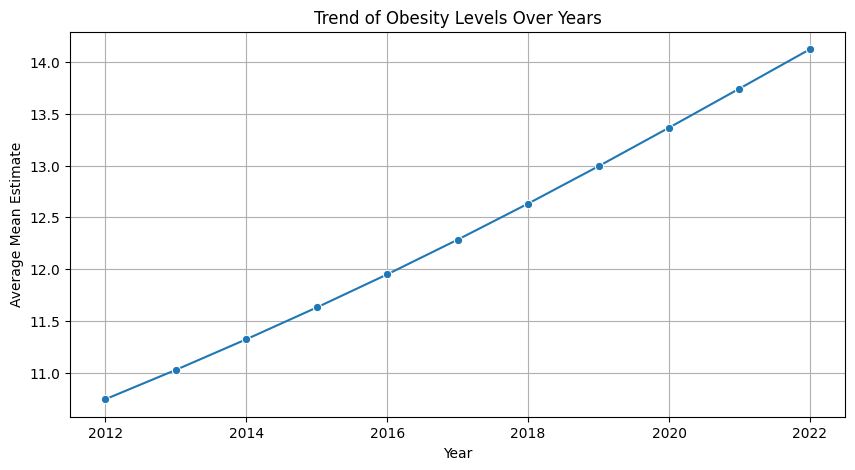

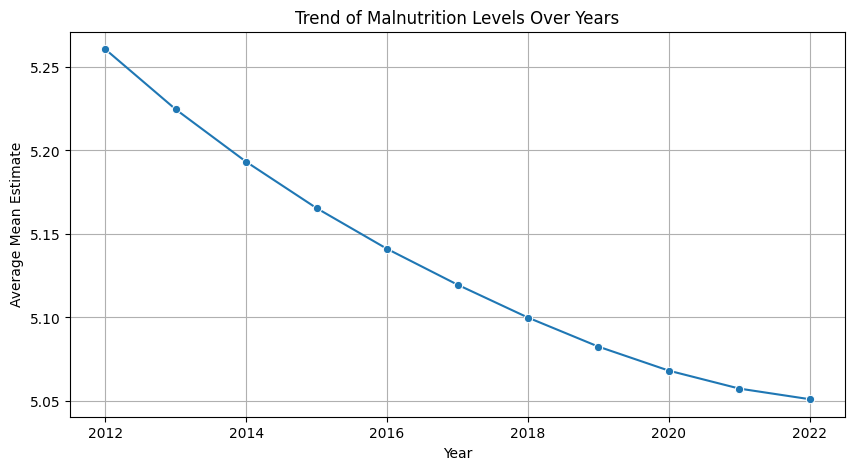

In [78]:
yearly_trend = df_obesity.groupby("Year")["Mean_Estimate"].mean()

plt.figure(figsize=(10,5))
sns.lineplot(x=yearly_trend.index, y=yearly_trend.values, marker="o")
plt.title("Trend of Obesity Levels Over Years")
plt.xlabel("Year")
plt.ylabel("Average Mean Estimate")
plt.grid(True)
plt.show()

yearly_trend = df_malnutrition.groupby("Year")["Mean_Estimate"].mean()

plt.figure(figsize=(10,5))
sns.lineplot(x=yearly_trend.index, y=yearly_trend.values, marker="o")
plt.title("Trend of Malnutrition Levels Over Years")
plt.xlabel("Year")
plt.ylabel("Average Mean Estimate")
plt.grid(True)
plt.show()

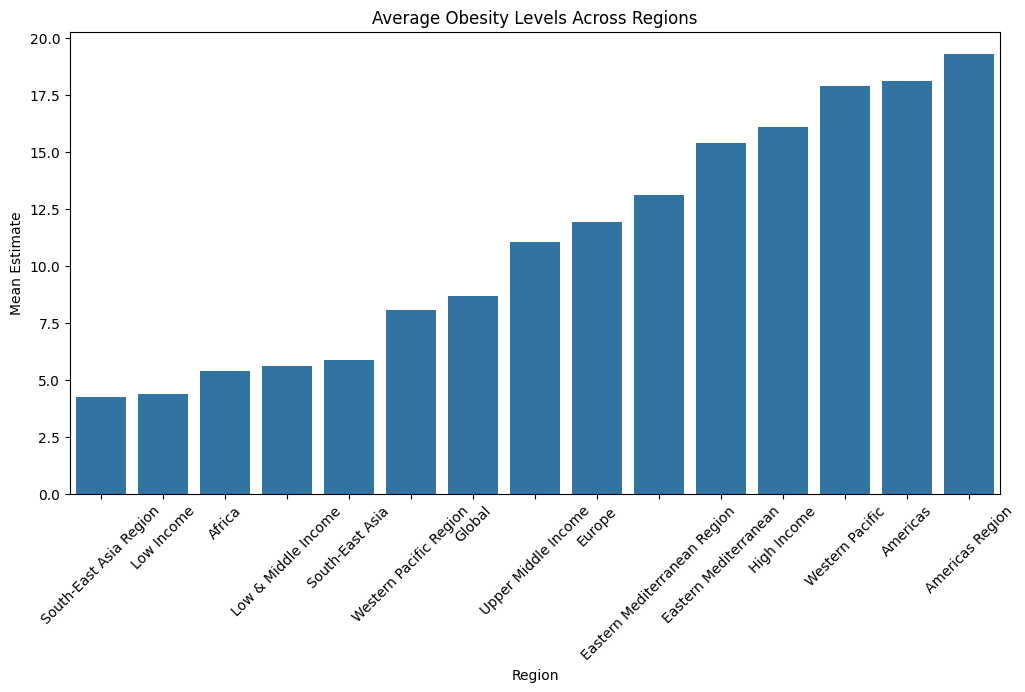

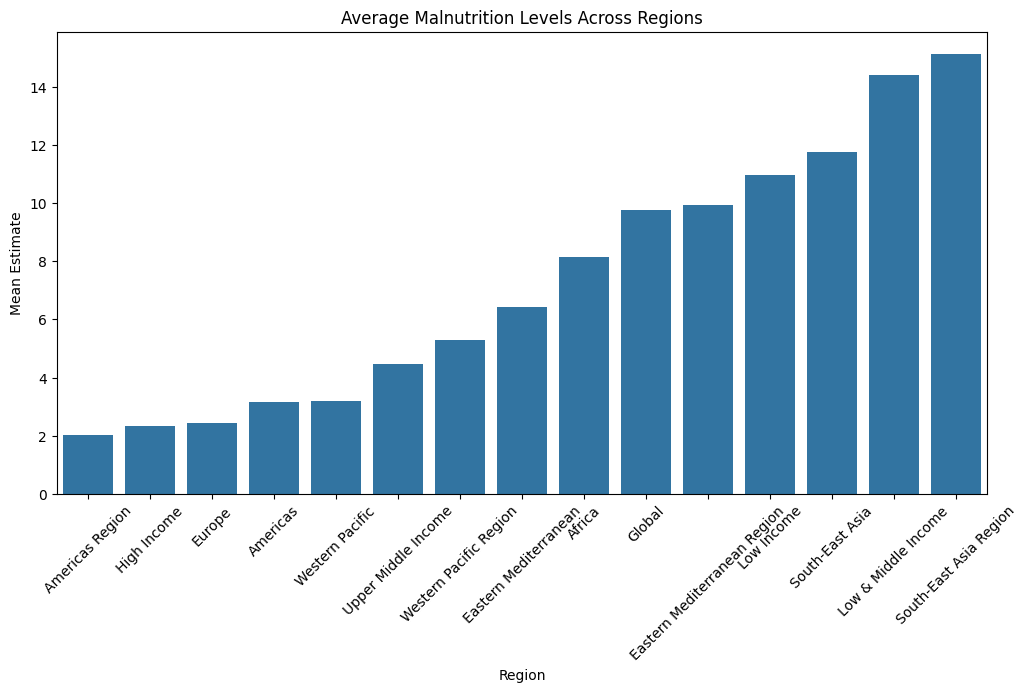

In [79]:
region_trend = df_obesity.groupby("Region")["Mean_Estimate"].mean().sort_values()

plt.figure(figsize=(12,6))
sns.barplot(x=region_trend.index, y=region_trend.values)
plt.xticks(rotation=45)
plt.title("Average Obesity Levels Across Regions")
plt.ylabel("Mean Estimate")
plt.show()

region_trend = df_malnutrition.groupby("Region")["Mean_Estimate"].mean().sort_values()

plt.figure(figsize=(12,6))
sns.barplot(x=region_trend.index, y=region_trend.values)
plt.xticks(rotation=45)
plt.title("Average Malnutrition Levels Across Regions")
plt.ylabel("Mean Estimate")
plt.show()

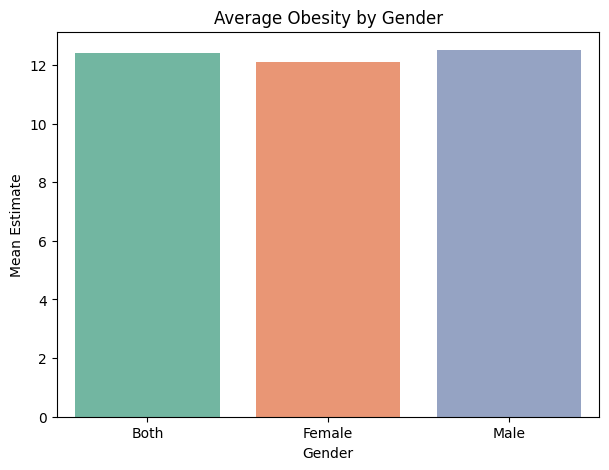

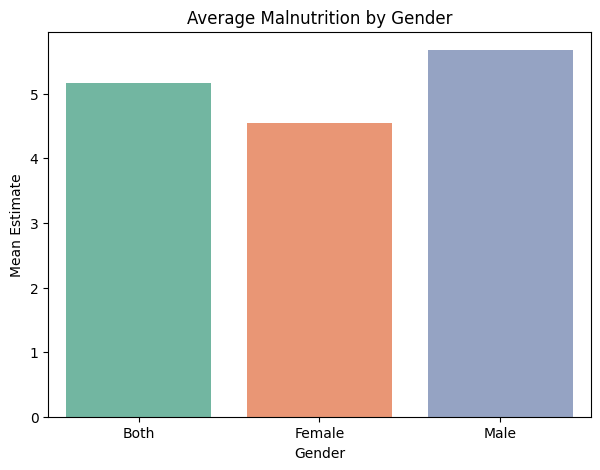

In [80]:
gender_trend = df_obesity.groupby("Gender")["Mean_Estimate"].mean()

plt.figure(figsize=(7,5))
sns.barplot(x=gender_trend.index, y=gender_trend.values, hue=gender_trend.index,palette="Set2",legend=False)
plt.title("Average Obesity by Gender")
plt.ylabel("Mean Estimate")
plt.show()


gender_trend = df_malnutrition.groupby("Gender")["Mean_Estimate"].mean()

plt.figure(figsize=(7,5))
sns.barplot(x=gender_trend.index, y=gender_trend.values,hue=gender_trend.index, palette="Set2",legend=False)
plt.title("Average Malnutrition by Gender")
plt.ylabel("Mean Estimate")
plt.show()





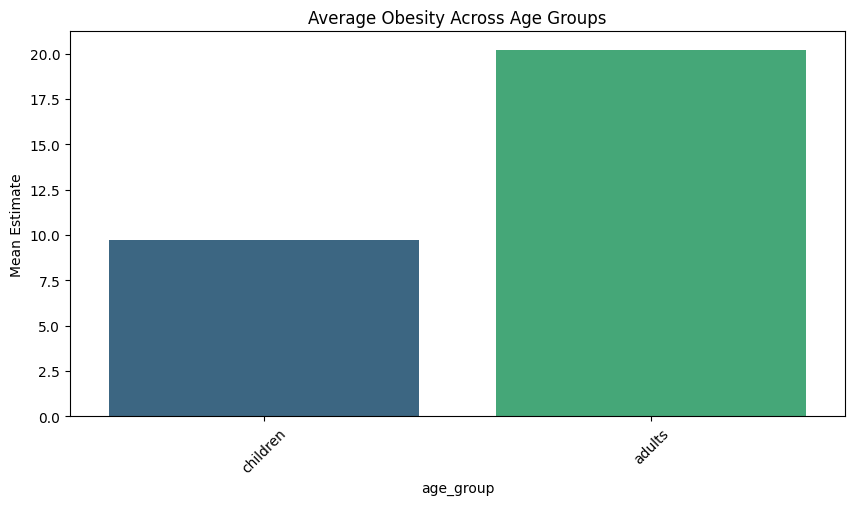

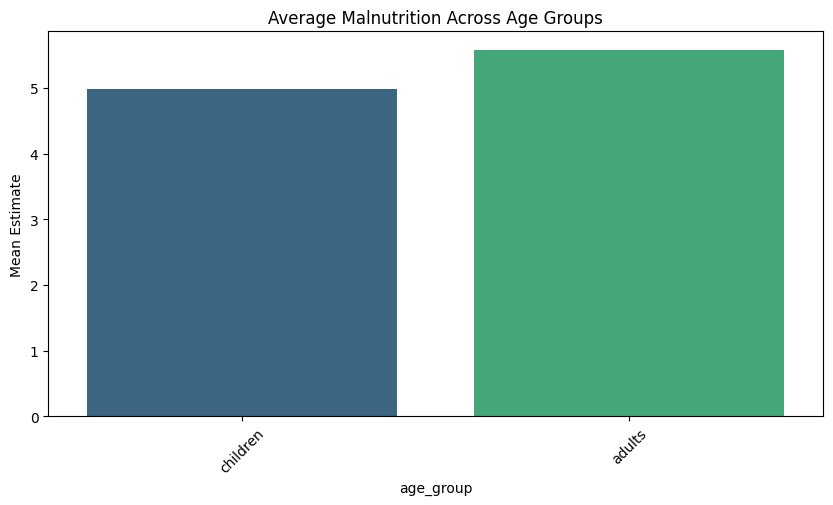

In [81]:
age_trend = df_obesity.groupby("age_group")["Mean_Estimate"].mean().sort_values()

plt.figure(figsize=(10,5))
sns.barplot(x=age_trend.index, y=age_trend.values, hue=age_trend.index, palette="viridis", legend=False)
plt.xticks(rotation=45)
plt.title("Average Obesity Across Age Groups")
plt.ylabel("Mean Estimate")
plt.show()

age_trend = df_malnutrition.groupby("age_group")["Mean_Estimate"].mean().sort_values()

plt.figure(figsize=(10,5))
sns.barplot(x=age_trend.index, y=age_trend.values,hue=age_trend.index, palette="viridis", legend=False)
plt.xticks(rotation=45)
plt.title("Average Malnutrition Across Age Groups")
plt.ylabel("Mean Estimate")
plt.show()

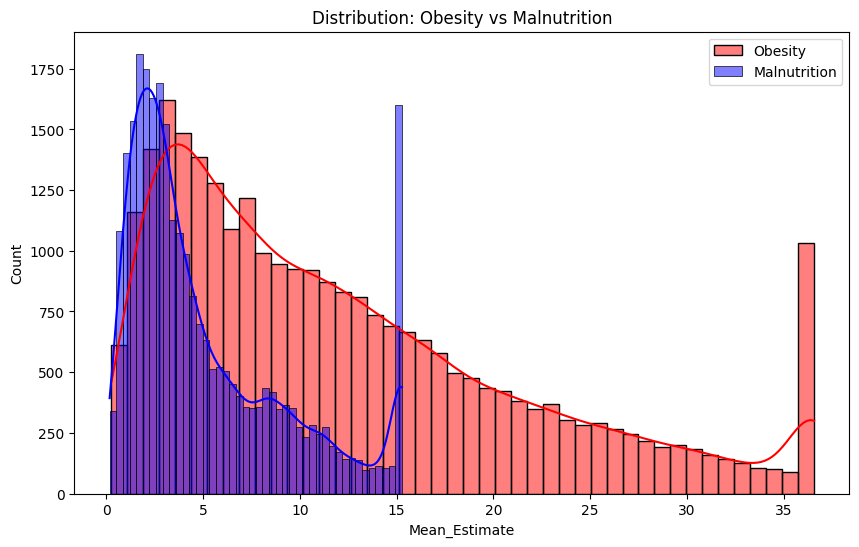

In [82]:
plt.figure(figsize=(10,6))
sns.histplot(df_obesity['Mean_Estimate'], color="red", label="Obesity", kde=True)
sns.histplot(df_malnutrition['Mean_Estimate'], color="blue", label="Malnutrition", kde=True)
plt.legend()
plt.title("Distribution: Obesity vs Malnutrition")
plt.show()


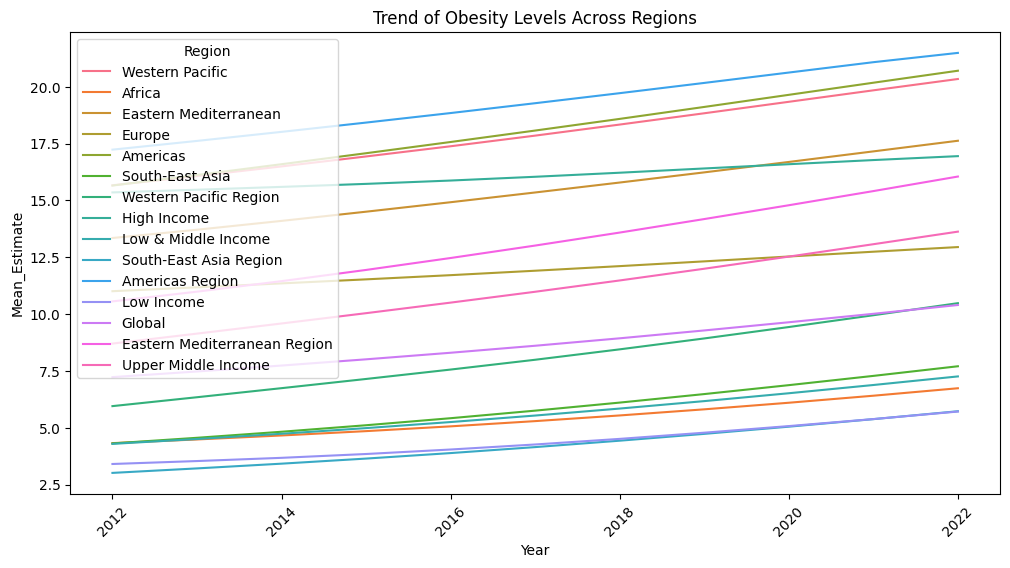

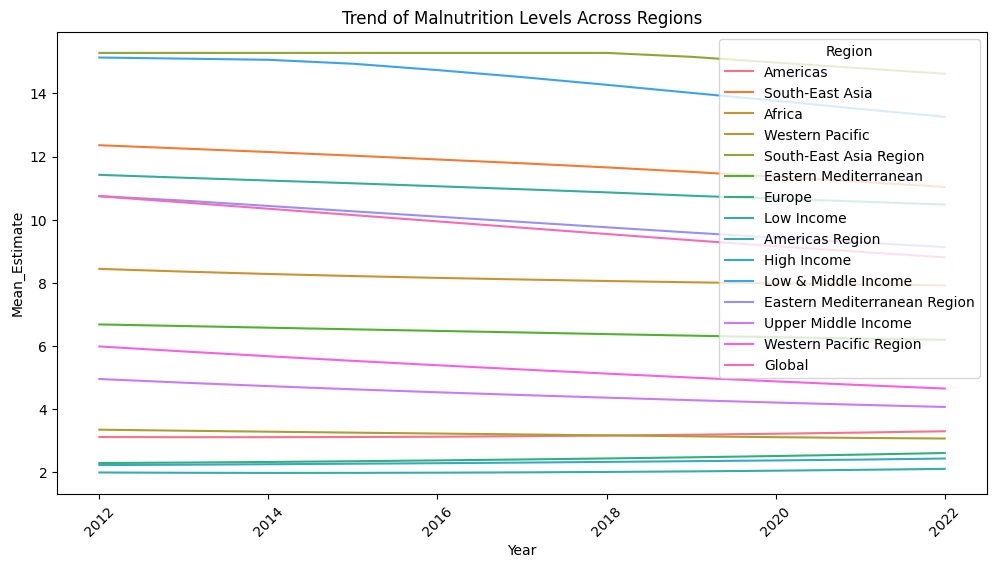

In [83]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df_obesity, x="Year", y="Mean_Estimate", hue="Region", errorbar=None)
plt.title("Trend of Obesity Levels Across Regions")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12,6))
sns.lineplot(data=df_malnutrition, x="Year", y="Mean_Estimate", hue="Region", errorbar=None)
plt.title("Trend of Malnutrition Levels Across Regions")
plt.xticks(rotation=45)
plt.show()

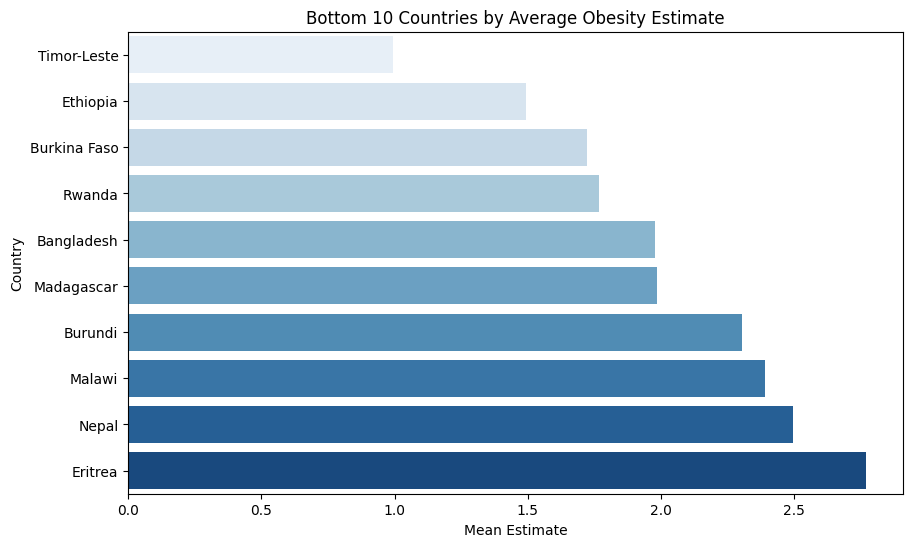

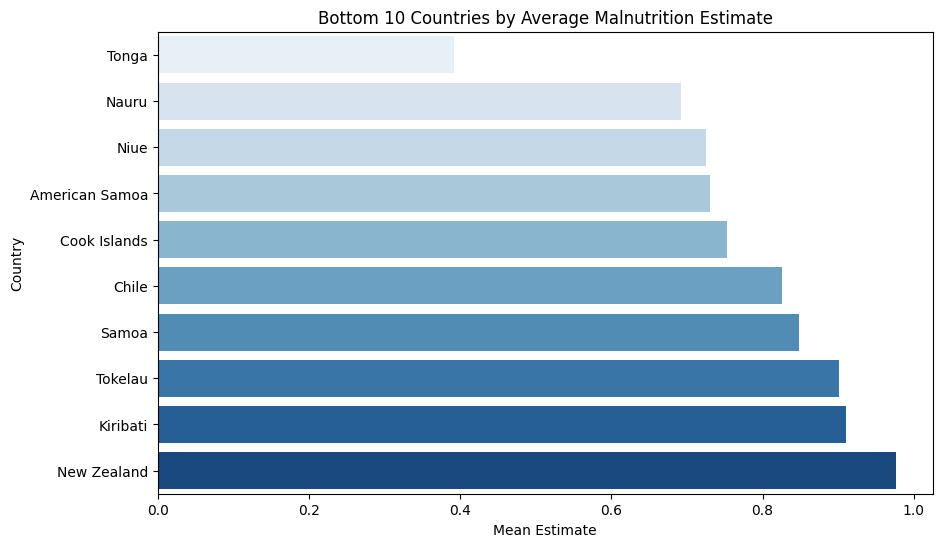

In [84]:
bottom_countries = df_obesity.groupby("Country")["Mean_Estimate"].mean().nsmallest(10)

plt.figure(figsize=(10,6))
sns.barplot(x=bottom_countries.values, y=bottom_countries.index,hue=bottom_countries.index,dodge=False, palette="Blues", legend=False)
plt.title("Bottom 10 Countries by Average Obesity Estimate")
plt.xlabel("Mean Estimate")
plt.ylabel("Country")
plt.show()

bottom_countries = df_malnutrition.groupby("Country")["Mean_Estimate"].mean().nsmallest(10)

plt.figure(figsize=(10,6))
sns.barplot(x=bottom_countries.values, y=bottom_countries.index,hue=bottom_countries.index,dodge=False, palette="Blues", legend=False)
plt.title("Bottom 10 Countries by Average Malnutrition Estimate")
plt.xlabel("Mean Estimate")
plt.ylabel("Country")
plt.show()

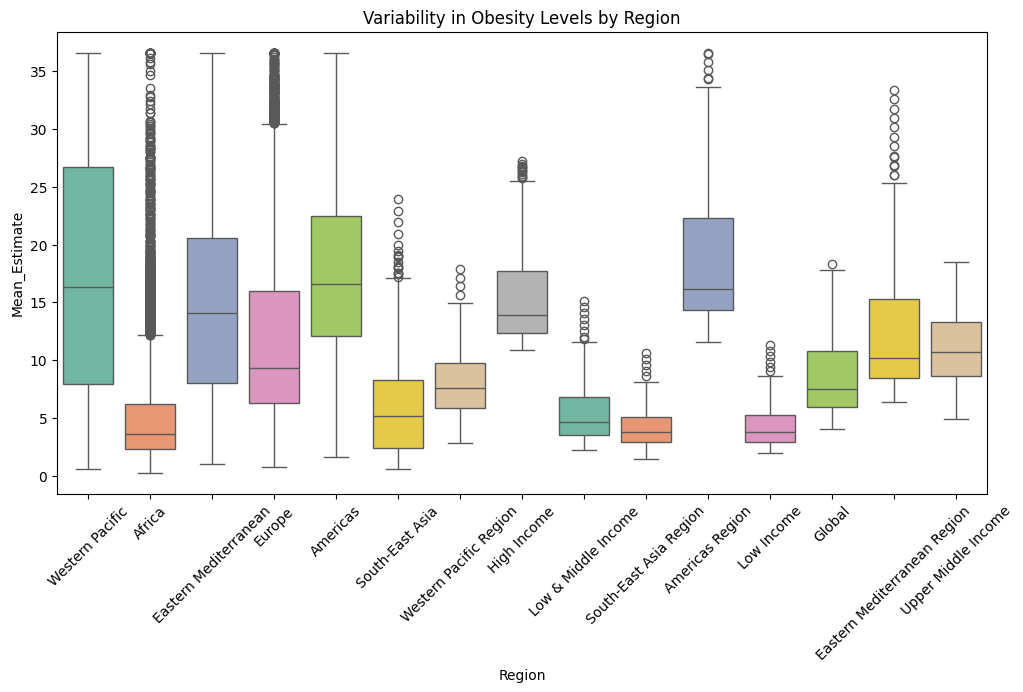

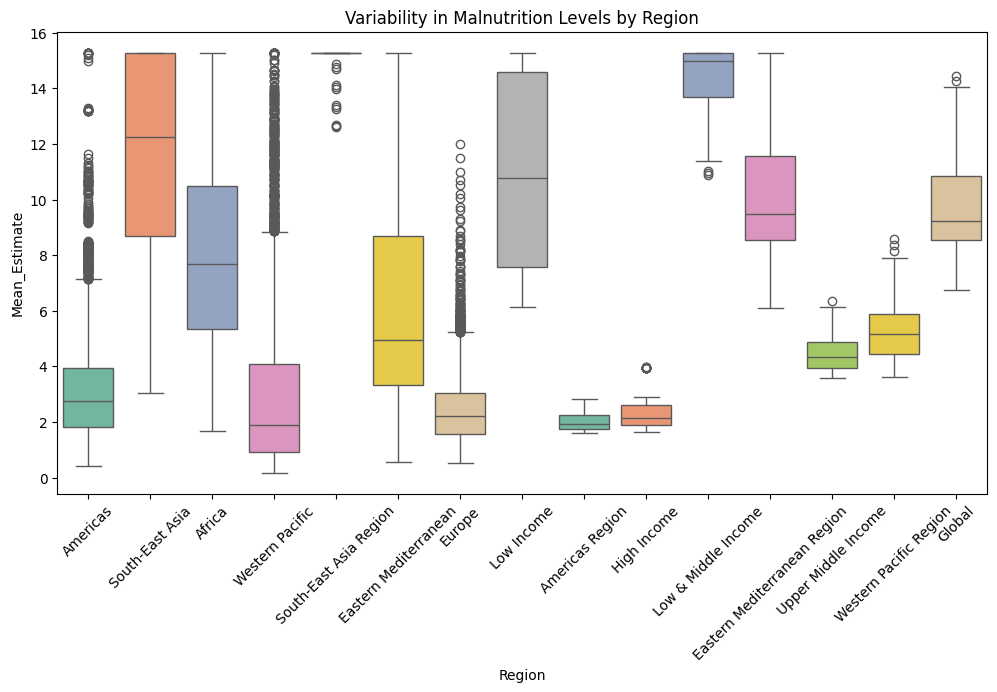

In [85]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df_obesity, x="Region", y="Mean_Estimate",hue='Region', palette="Set2", legend=False)
plt.title("Variability in Obesity Levels by Region")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12,6))
sns.boxplot(data=df_malnutrition, x="Region", y="Mean_Estimate",hue='Region', palette="Set2", legend=False)
plt.title("Variability in Malnutrition Levels by Region")
plt.xticks(rotation=45)
plt.show()

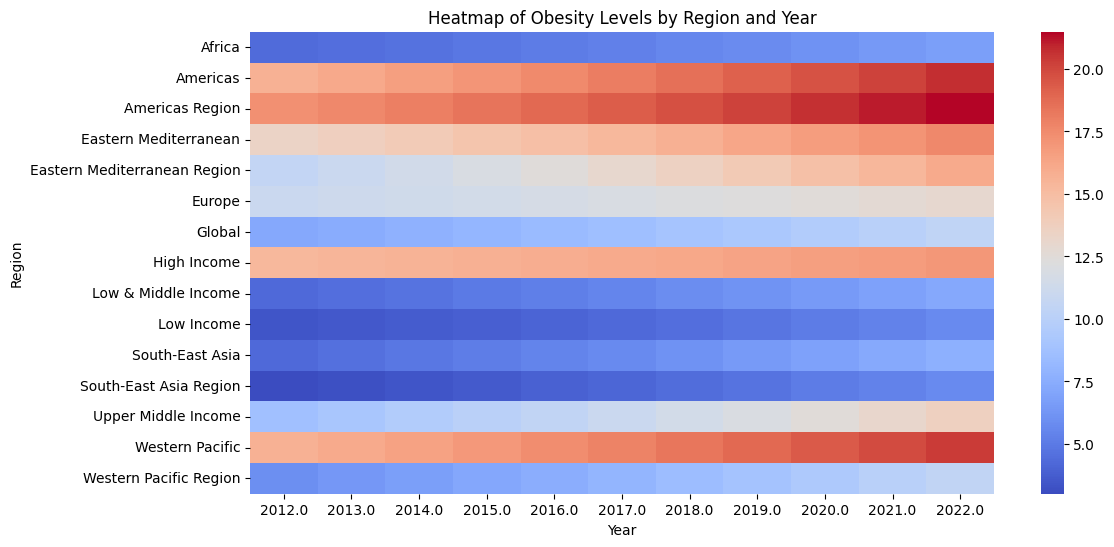

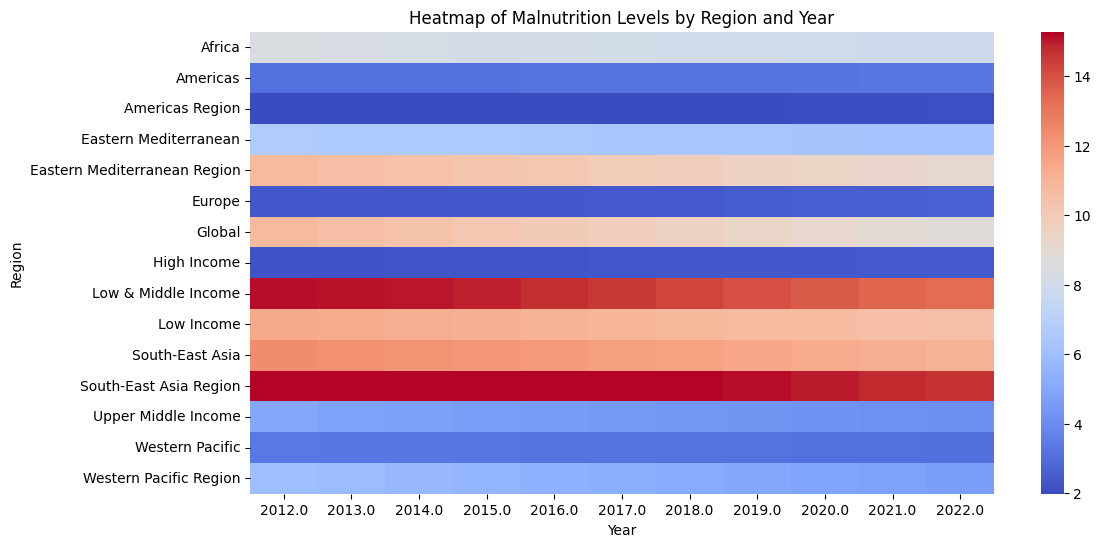

In [86]:
pivot_table = df_obesity.pivot_table(values="Mean_Estimate", index="Region", columns="Year", aggfunc="mean")

plt.figure(figsize=(12,6))
sns.heatmap(pivot_table, cmap="coolwarm", annot=False, cbar=True)
plt.title("Heatmap of Obesity Levels by Region and Year")
plt.show()

pivot_table = df_malnutrition.pivot_table(values="Mean_Estimate", index="Region", columns="Year", aggfunc="mean")

plt.figure(figsize=(12,6))
sns.heatmap(pivot_table, cmap="coolwarm", annot=False, cbar=True)
plt.title("Heatmap of Malnutrition Levels by Region and Year")
plt.show()

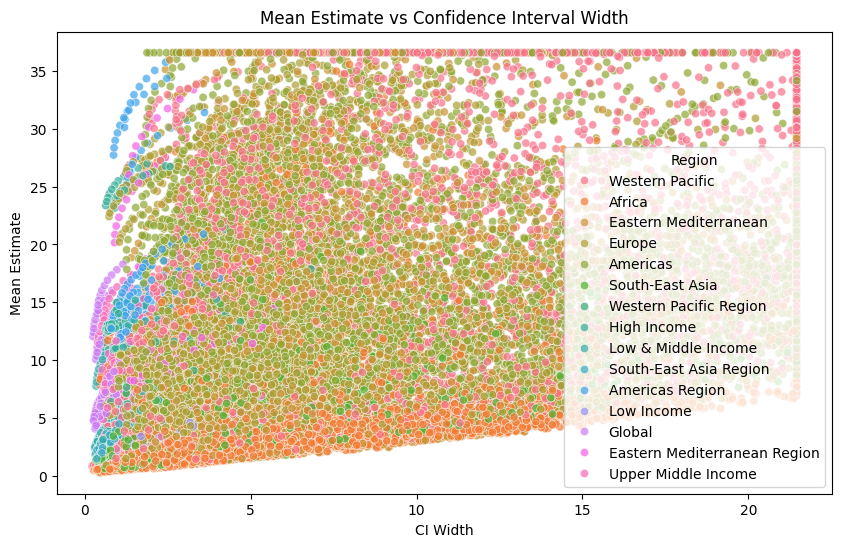

c:\Users\MUTHURAJ\Desktop\Python\learning_venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


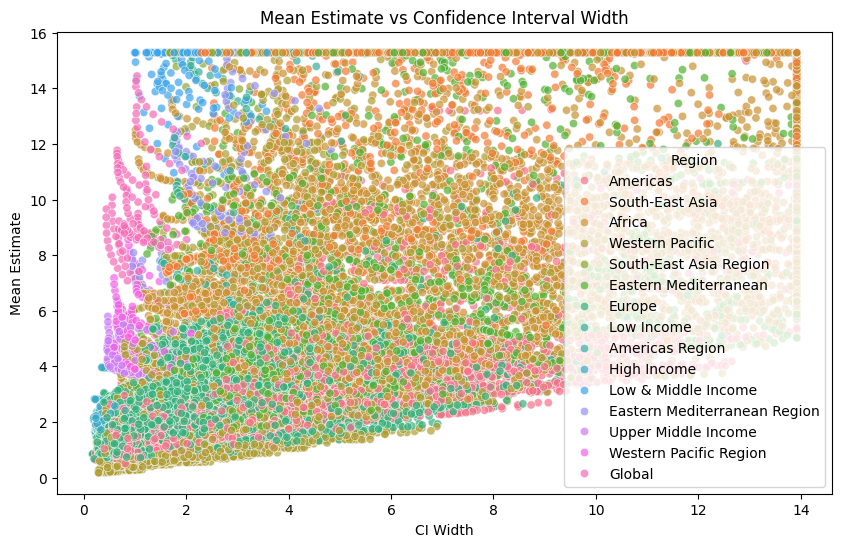

In [87]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_obesity, x="CI_Width", y="Mean_Estimate", hue="Region", alpha=0.7)
plt.title("Mean Estimate vs Confidence Interval Width")
plt.xlabel("CI Width")
plt.ylabel("Mean Estimate")
plt.show()

plt.figure(figsize=(10,6))
sns.scatterplot(data=df_malnutrition, x="CI_Width", y="Mean_Estimate", hue="Region", alpha=0.7)
plt.title("Mean Estimate vs Confidence Interval Width")
plt.xlabel("CI Width")
plt.ylabel("Mean Estimate")
plt.show()

In [88]:
df_obesity.to_csv("df_obesity_cleaned.csv",index=False)
df_malnutrition.to_csv("df_malnutrition_cleaned.csv",index=False)